# Visualizing Covid-19 data

This notebook was used to experiment learning jupyter and analyzing real life data. The data used is the number of confirmed cases, number of deaths, and total number of cases. 

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#plot maplotlib plots as 
%matplotlib inline
plt.style.use('fivethirtyeight')

df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


# Cases over time 

The plot below shows the different types of cases

In [13]:
df['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0


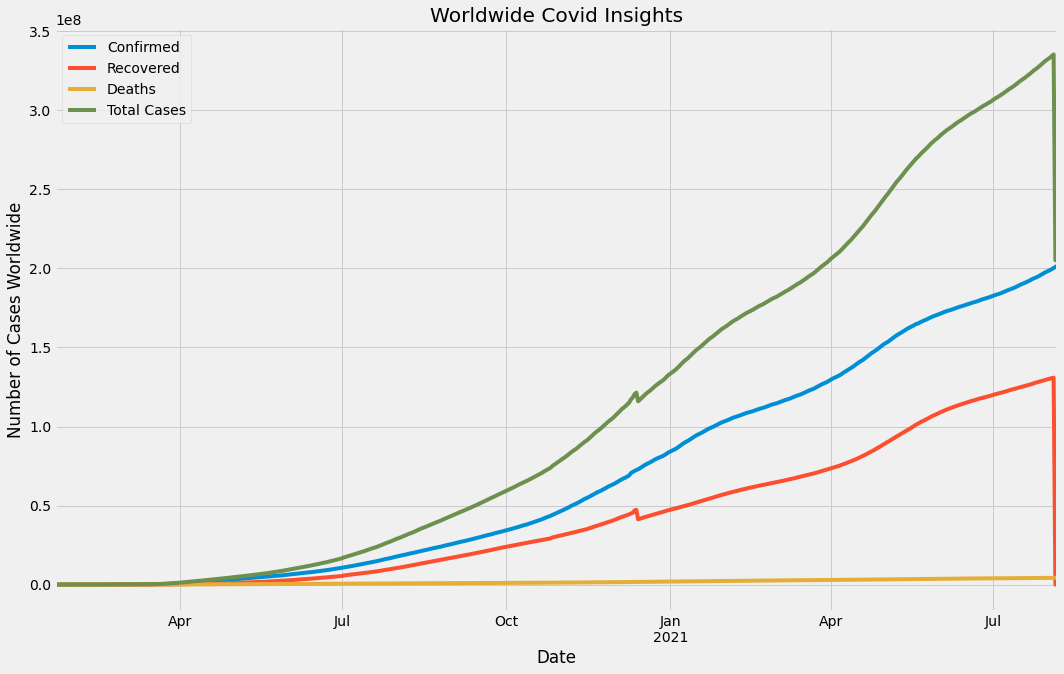

In [14]:
world_df = df.groupby(['Date']).sum()
wplot = world_df.plot(figsize=(16,10))
wplot.set_xlabel('Date')
wplot.set_ylabel('Number of Cases Worldwide')
wplot.title.set_text('Worldwide Covid Insights')

## U.S cases compared worldwide

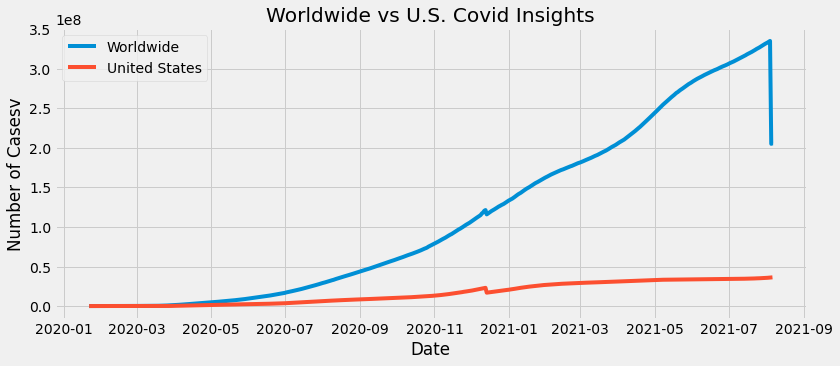

In [19]:
filt = df['Country'] == 'US'
us_df = df[filt].groupby(['Date']).sum()

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.plot(world_df[['Total Cases']], label ='Worldwide')
ax.plot(us_df[['Total Cases']], label='United States')

ax.set_xlabel('Date')
ax.set_ylabel('Number of Casesv')
ax.title.set_text('Worldwide vs U.S. Covid Insights')
plt.legend(loc='upper left')

## US Cases and Deaths

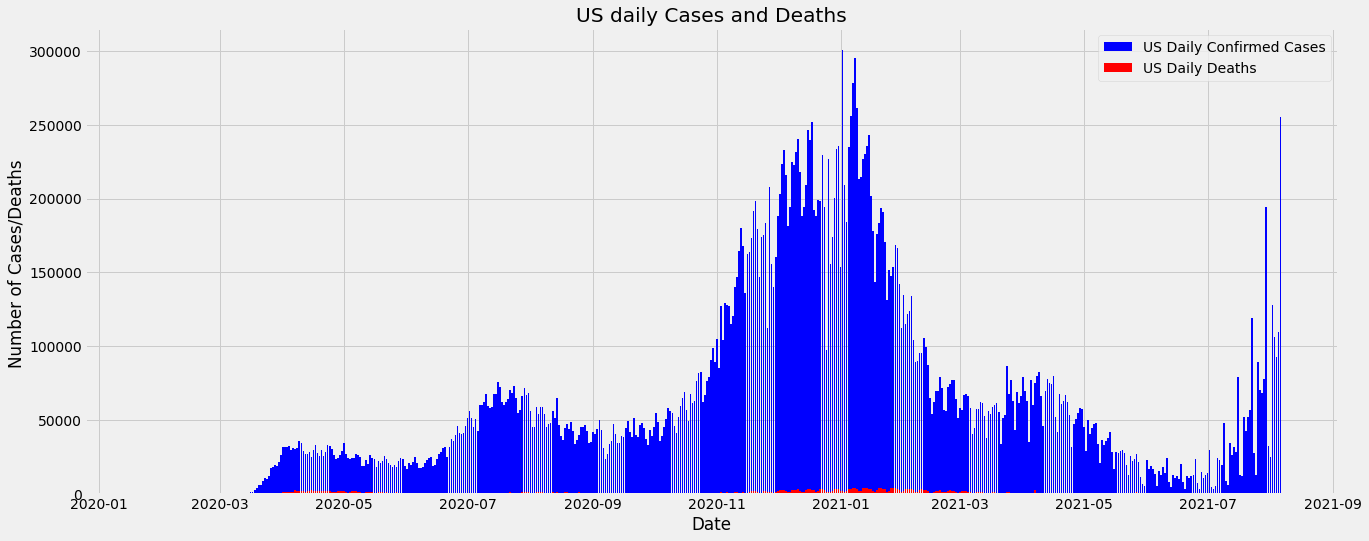

In [33]:
us_df['Daily Confirmed'] = us_df['Confirmed'].sub(us_df['Confirmed'].shift())
us_df['Daily Deaths'] = us_df['Deaths'].sub(us_df['Deaths'].shift())
us_df.head()

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.bar(us_df['Date'],
       us_df['Daily Confirmed'],
      color='b',
      label='US Daily Confirmed Cases')

ax.bar(us_df['Date'],
      us_df['Daily Deaths'],
      color='r',
      label='US Daily Deaths')


ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases/Deaths ')
ax.title.set_text('US daily Cases and Deaths')
plt.legend(loc='upper right')

## Hardest Countries hit 

In [47]:
from datetime import date, timedelta

yest = pd.Timestamp('today').normalize() - timedelta(days=1)
yest.strftime('%Y-%m-%d')


today_df = df[df['Date'] == yest]
top_10 = today_df.sort_values(['Confirmed'], ascending=False)[:10]
top_10

,Date,Country,Confirmed,Recovered,Deaths
102465,2021-08-06,US,35695469,0,616493
45039,2021-08-06,India,31856757,0,426754
13511,2021-08-06,Brazil,20108746,0,561762
35468,2021-08-06,France,6325144,0,112347
81634,2021-08-06,Russia,6318643,0,160574
104717,2021-08-06,United Kingdom,6042529,0,130482
101902,2021-08-06,Turkey,5870741,0,51976
3940,2021-08-06,Argentina,5002951,0,107213
21393,2021-08-06,Colombia,4828583,0,122087
92894,2021-08-06,Spain,4588132,0,82006


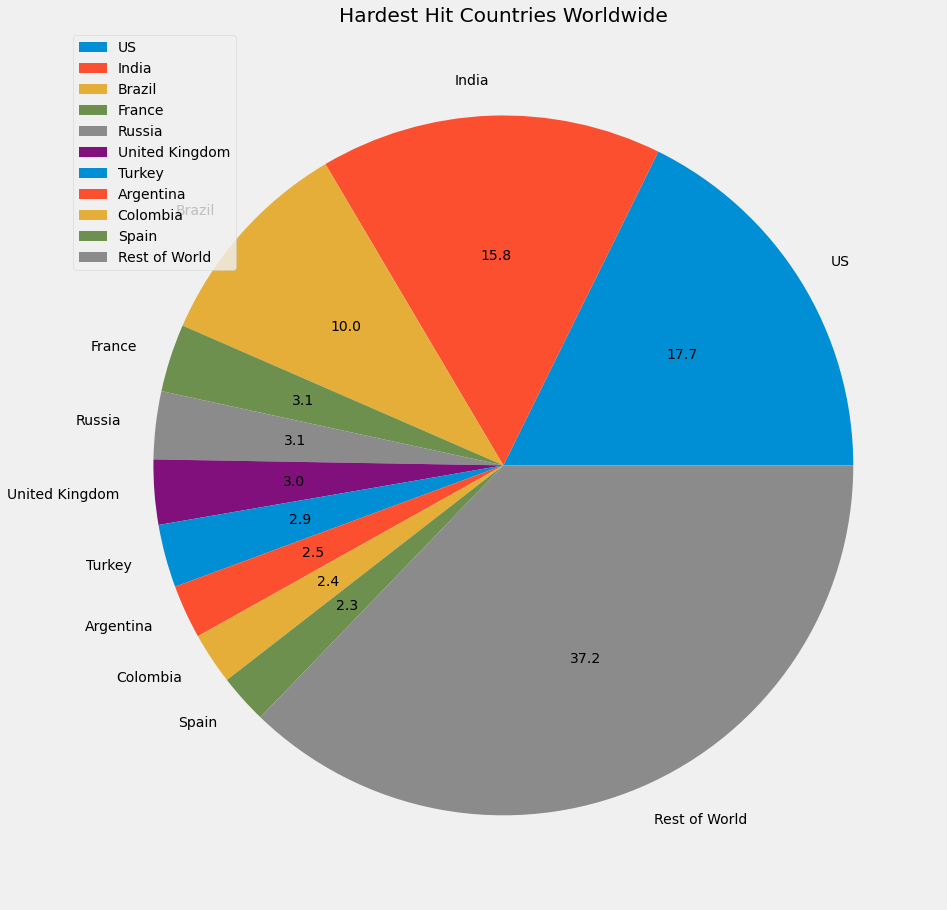

In [56]:
# sum the remaining countries together
top_10.loc['rest-of-world'] = today_df.sort_values(['Confirmed'], ascending=False)[10:].sum()
top_10.loc['rest-of-world', 'Country'] = 'Rest of World'


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

ax.pie(top_10['Confirmed'],
       labels = top_10['Country'],
       autopct='%1.1f')
ax.title.set_text('Hardest Hit Countries Worldwide')
plt.legend(loc='upper left')
